In [2]:
code = "DX-Y.NYB"
symbol = code
ticker = yf.Ticker(symbol)

In [4]:
# 週足で過去 5 年分のデータを取得
df0 = ticker.history(period="10y", interval="1wk")

# ローソク足のチャートには、そのうち過去 3 年分のみ使用する
dt_last = df0.index[len(df0) - 1]
tdelta_3y = datetime.timedelta(days=365 * 3)
df = df0[df0.index >= dt_last - tdelta_3y]
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-20 00:00:00-05:00,103.879997,105.320000,103.760002,105.209999,0,0.0,0.0
2023-02-27 00:00:00-05:00,105.260002,105.360001,104.089996,104.519997,0,0.0,0.0
2023-03-06 00:00:00-05:00,104.529999,105.879997,104.040001,104.580002,0,0.0,0.0
2023-03-13 00:00:00-04:00,104.389999,105.099998,103.440002,103.709999,0,0.0,0.0
2023-03-20 00:00:00-04:00,103.860001,103.959999,101.919998,103.120003,0,0.0,0.0
...,...,...,...,...,...,...,...
2026-01-19 00:00:00-05:00,99.139999,99.139999,97.430000,97.599998,0,0.0,0.0
2026-01-26 00:00:00-05:00,97.029999,97.330002,95.550003,96.989998,0,0.0,0.0
2026-02-02 00:00:00-05:00,97.190002,97.989998,97.010002,97.629997,0,0.0,0.0


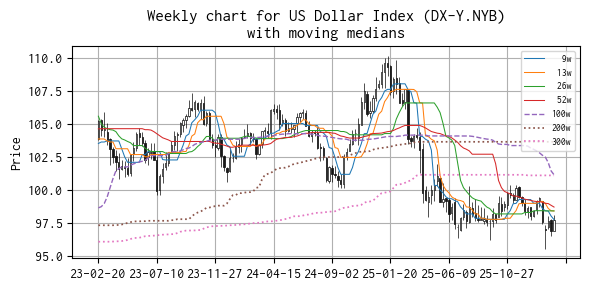

In [6]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 10

fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)

mm09 = df0["Close"].rolling(9).median()
mm13 = df0["Close"].rolling(13).median()
mm26 = df0["Close"].rolling(26).median()
mm52 = df0["Close"].rolling(52).median()
mm100 = df0["Close"].rolling(100).median()
mm200 = df0["Close"].rolling(200).median()
mm300 = df0["Close"].rolling(300).median()
apds = [
    mpf.make_addplot(mm09[df.index], width=0.75, label="  9w", ax=ax),
    mpf.make_addplot(mm13[df.index], width=0.75, label=" 13w", ax=ax),
    mpf.make_addplot(mm26[df.index], width=0.75, label=" 26w", ax=ax),
    mpf.make_addplot(mm52[df.index], width=0.75, label=" 52w", ax=ax),
    mpf.make_addplot(
        mm100[df.index], width=1, linestyle="dashed", label="100w", ax=ax
    ),
    mpf.make_addplot(
        mm200[df.index],
        width=1.25,
        linestyle="dotted",
        label="200w",
        ax=ax,
    ),
    mpf.make_addplot(
        mm300[df.index],
        width=1.25,
        linestyle="dotted",
        label="300w",
        ax=ax,
    ),
]

mpf.plot(
    df,
    type="candle",
    style="default",
    volume=False,
    datetime_format="%y-%m-%d",
    addplot=apds,
    xrotation=0,
    ax=ax,
)
ax.set_title(
    "Weekly chart for %s (%s)\nwith moving medians" % (ticker.info["longName"], symbol)
)

ax.legend(loc="best", fontsize=7)
ax.grid()

plt.tight_layout()
plt.savefig(os.path.join(year_str, f"{date_str}_report_weekly_chart_robust_{code}.png"))
plt.show()

In [8]:
df.tail(2)["Close"]

Date
2026-02-09 00:00:00-05:00    96.879997
2026-02-16 00:00:00-05:00    97.748001
Name: Close, dtype: float64

## Robust Bollinger bands

## ヒストグラム